# <b/> <center><font color='green'>Plant Disease Classification</font></center>

## <b/> Importing Libraries

In [20]:
# Imorting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random

import os
from os import listdir

from sklearn.preprocessing import label_binarize, LabelBinarizer
from sklearn.model_selection import train_test_split

import cv2
from PIL import Image
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from keras.models import model_from_json
from keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore')

## <b/> Loading Dataset

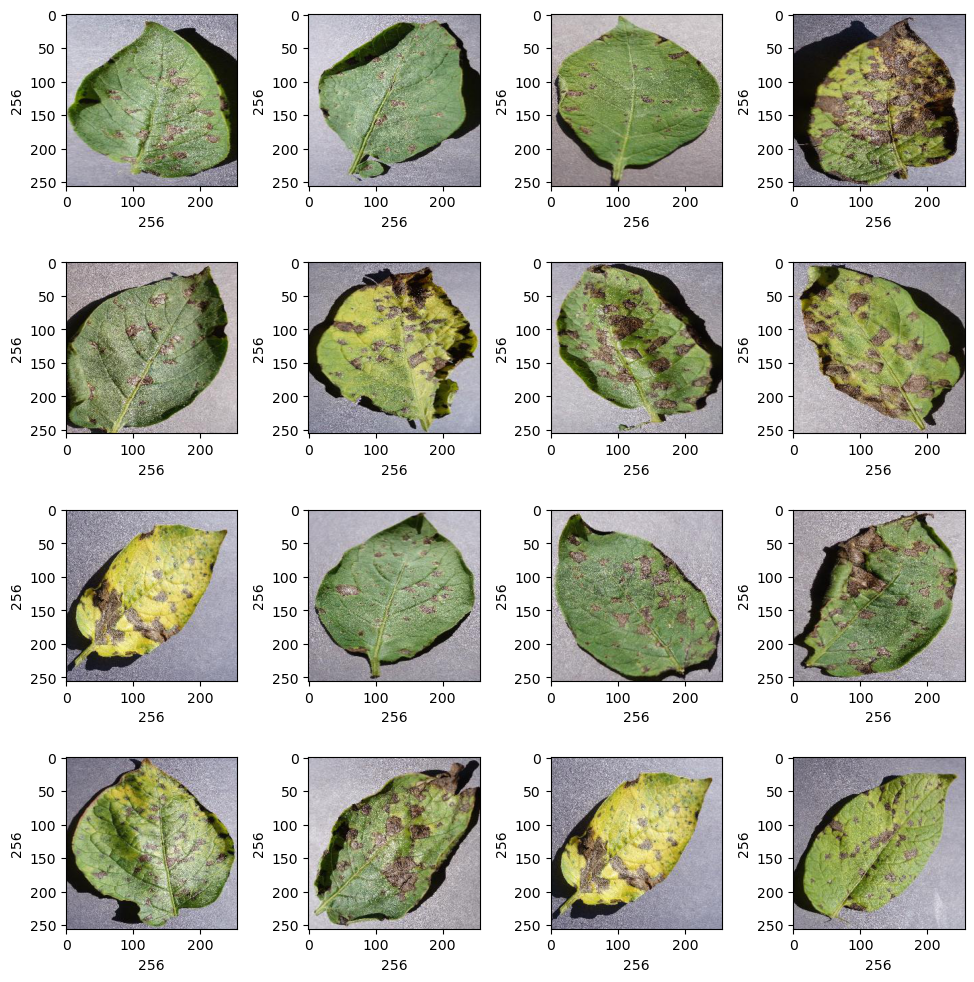

In [21]:
# Plotting 16 Images from the dataset
plt.figure(figsize=(10,10))
path = '/Users/Ankush/Desktop/Data Science/Plant Disease Classification/PlantVillage/Potato_Early_Blight'
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path + '/' + random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10) # Width
    plt.ylabel(rand_img.shape[0], fontsize = 10) # Height

## <b/> Data Preprocessing

In [22]:
# Converting images into numpy arrays
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, (256,256))
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [24]:
dir = "/Users/Ankush/Desktop/Data Science/Plant Disease Classification/PlantVillage"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Potato_Early_Blight', 'Corn_Common_Rust', 'Tomato_Bacterial_Spot'] 
binary_labels = [0,1,2] 
temp = -1 

# Reading and converting image to numpy array 
for directory in root_dir:
    
    plant_image_list = listdir(f"{dir}/{directory}")
    temp += 1 
    
    for files in plant_image_list: 
        image_path = f"{dir}/{directory}/{files}" 
        image_list.append(convert_image_to_array(image_path)) 
        label_list.append (binary_labels[temp])

In [25]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0
0    300
1    300
2    300
Name: count, dtype: int64

In [26]:
image_list[0].shape

(256, 256, 3)

In [27]:
label_list = np.array(label_list)
label_list.shape

(900,)

## <b/> Splitting the Dataset Train & Test

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(image_list, label_list, test_size=0.2, random_state=10)

In [29]:
X_train = np.array(X_train, dtype=np.float16) / 255.0
X_test = np.array(X_test, dtype=np.float16) / 255.0
X_train = X_train.reshape(-1, 256, 256, 3)
X_test = X_test.reshape(-1, 256, 256, 3)

In [30]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

## <b/>Model Building

In [31]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding="same", input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(3, activation="softmax"))

model.summary()

2024-08-13 14:49:31.976914: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-08-13 14:49:31.977100: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-08-13 14:49:31.977109: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-08-13 14:49:31.977736: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-13 14:49:31.978528: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 85, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 85, 85, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 112896)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     7,225,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,244,995 (27.64 MB)

 Trainable params: 7,244,995 (27.64 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics=['accuracy'])

## <b/> Slitting the Dataset Training and Validation

In [33]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)

## <b/> Model Training

In [34]:
epochs = 50
batch_size = 128

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, Y_val))

Epoch 1/50


2024-08-13 14:55:34.832479: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.3677 - loss: 1.0573 - val_accuracy: 0.8681 - val_loss: 0.6689
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.8132 - loss: 0.5918 - val_accuracy: 0.9097 - val_loss: 0.4143
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9505 - loss: 0.3484 - val_accuracy: 0.9375 - val_loss: 0.2691
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9589 - loss: 0.2210 - val_accuracy: 0.9444 - val_loss: 0.1797
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.9638 - loss: 0.1549 - val_accuracy: 0.9653 - val_loss: 0.1192
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.9673 - loss: 0.1162 - val_accuracy: 0.9792 - val_loss: 0.1127
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.9799 - loss: 0.0942 - val_accuracy: 0.9792 - val_loss: 0.0687
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.9933 - loss: 0.0577 - val_accuracy: 0.9792 - val_loss: 0.0588
Epoch 9/50
5/5 ━━━━━━━━━

In [36]:
# Saving the Model in different techniques
# in h5
model.save("/Users/Ankush/Desktop/Data Science/Plant Disease Classification/plant_disease.h5")

# in json
json_model = model.to_json()
with open('/Users/Ankush/Desktop/Data Science/Plant Disease Classification/plant_model.json', 'w') as json_file:
    json_file.write(json_model)

# saving the weights of the model
model.save_weights('/Users/Ankush/Desktop/Data Science/Plant Disease Classification/plant_model_weights.weights.h5')

# <b/> Plot Training History

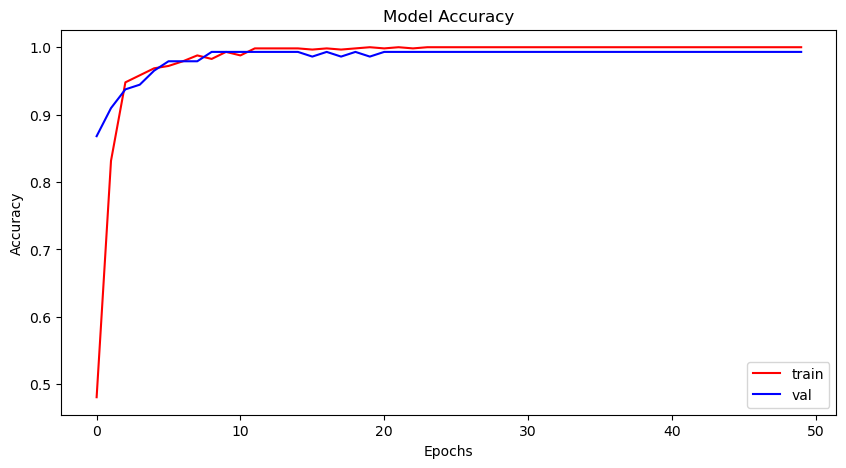

In [37]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])

plt.show()

## <b/> Model Accuracy

In [38]:
print('Calculating Model Accuracy')
scores = model.evaluate(X_test, Y_test)
print(f'Test Accuracy : {scores[1] * 100}')

Calculating Model Accuracy
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.9882 - loss: 0.0147
Test Accuracy : 99.44444298744202


In [39]:
Y_pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step


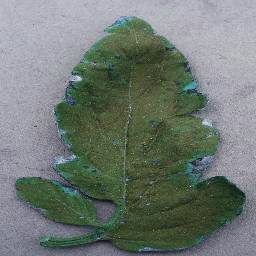

In [54]:
# Plotting image to compare
img = array_to_img(X_test[25])
img

In [56]:
# finding max value from prediction list and comparing original and predicted values
print("Originally : ", all_labels[np.argmax(Y_test[25])])
print("Predicted : ", all_labels[np.argmax(Y_pred[25])])

Originally :  Tomato_Bacterial_Spot
Predicted :  Tomato_Bacterial_Spot


-----

# <b/> CONCLUSION: 
### We started with laoding the dataset and visualizing the images. Normalizing is an important step when working with any type of dataset. After that we created a CNN model which is further used for predicting the plant diseases using the images supplied to the model. This model is highly beneficial as it can be used by different agricultural firms and farmers to increase their yeild and stop wastage of crops due to plant diseases.